In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [4]:
data=pd.read_csv("https://raw.githubusercontent.com/AP-State-Skill-Development-Corporation/Datasets/master/Data%20Analysis/Advertising.csv")
data

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [64]:
##removing un wanted rows
data.drop('Unnamed: 0',axis="1", inplace=True)
data

ValueError: No axis named 1 for object type DataFrame

In [53]:
x=data['TV'].values
x.shape

(200,)

In [54]:
y=data['sales'].values
y.shape

(200,)

In [55]:
##calculating coefficient ## mean of x and y
mean_x=np.mean(x)
print(mean_x)
mean_y=np.mean(y)
print(mean_y)

147.0425
14.0225


In [56]:
#total number of values
n= len(x)
n

200

In [57]:
##calculating acc to the formula y=b0+b1
numer=0
deno=0
for i in range (n):
    numer+=(x[i]-mean_x)*(y[i]-mean_y)
    deno+=(x[i]-mean_x)**2
b1=numer/deno
b0=mean_y-(b1*mean_x)
print(b1,b0,sep="\n")

0.04753664043301969
7.032593549127704


In [25]:
print("linear equation:: y={:.4}x+{:.5}".format(b1,b0)) ##regression line

linear equation:: y=0.04754x+7.0326


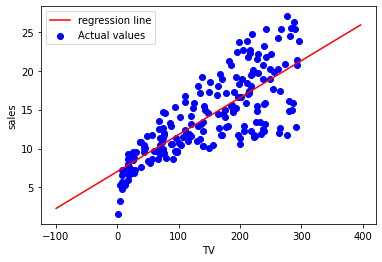

In [58]:
##plotting values and regression line
max_x=np.max(x)+100
min_x=np.min(x)-100
#print(max_x,min_x)
x1=np.linspace(min_x,max_x,1000)
y1=b0+b1*x1
plt.plot(x1,y1,color='r',label='regression line')
plt.scatter(x,y,color='b',label='Actual values')
plt.xlabel("TV")
plt.ylabel("sales")
plt.legend(loc="best")
plt.show()

In [59]:
##predicting value using the graph
y_pred=b0+b1*x[2]
y_pred

7.8502237645756425

In [60]:
#correlation coefficient range (-1 to 1) it used to seee how far and near the data id form the fit line 
#determination coefficient range(0 to 1)(R^2) [FORMULA=1-(total sum of squares of residuals/sum of residuals)]

ss_tot=0
ss_res=0
for i in range (n):
    y_pred=b0+b1*x[i]
    ss_res+=(y[i]-y_pred)**2
    ss_tot+=(y[i]-mean_y)**2
r2=1-(ss_res/ss_tot)
r2
    
    

0.6118750508500708

In [65]:
##By using sklearn no need to do all of this code
from sklearn.linear_model import LinearRegression

In [66]:
x=data["TV"].values.reshape(-1,1)
y=data["sales"].values.reshape(-1,1)
reg=LinearRegression() #applying data to the model
reg.fit(x,y)       #fit the data

LinearRegression()

In [71]:
print(reg.coef_)
print(reg.intercept_)

[[0.04753664]]
[7.03259355]


In [72]:
reg.predict([[230.1]])

array([[17.97077451]])

In [74]:
pred=reg.predict(x)
pred

array([[17.97077451],
       [ 9.14797405],
       [ 7.85022376],
       [14.23439457],
       [15.62721814],
       [ 7.44616232],
       [ 9.76595037],
       [12.74649773],
       [ 7.44140866],
       [16.53041431],
       [10.17476548],
       [17.23871025],
       [ 8.16396559],
       [11.66741599],
       [16.73482186],
       [16.32125309],
       [10.25557777],
       [20.40940417],
       [10.32212907],
       [14.03474068],
       [17.41459582],
       [18.31779199],
       [ 7.6600772 ],
       [17.88520856],
       [ 9.99412625],
       [19.52997632],
       [13.82557947],
       [18.44614092],
       [18.85970969],
       [10.38868036],
       [20.95607553],
       [12.39948025],
       [11.653155  ],
       [19.65832525],
       [11.58185004],
       [20.85149492],
       [19.72012288],
       [10.58358059],
       [ 9.08142275],
       [17.87094757],
       [16.65876324],
       [15.44657891],
       [20.98935118],
       [16.86792445],
       [ 8.22576322],
       [15

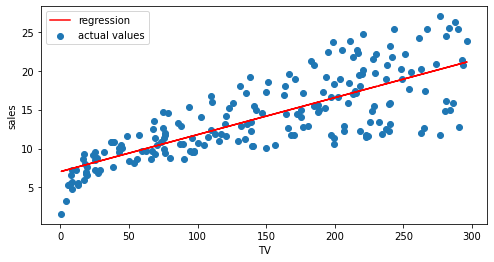

In [84]:
plt.figure(figsize=(8,4))
plt.scatter(data['TV'],data['sales'],label='actual values')
plt.plot(data['TV'],pred,label='regression',c='r')
plt.xlabel("TV")
plt.ylabel("sales")
plt.legend(loc="best")

In [85]:
##r2 score
r2=reg.score(x,y)
print(r2)


0.611875050850071


In [131]:
##using an-other dataset
df=pd.read_csv("https://raw.githubusercontent.com/AP-State-Skill-Development-Corporation/Datasets/master/Regression/headbrain.csv")
df

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590
...,...,...,...,...
232,2,2,3214,1110
233,2,2,3394,1215
234,2,2,3233,1104
235,2,2,3352,1170


In [132]:
df.isna().sum()

Gender                 0
Age Range              0
Head Size(cm^3)        0
Brain Weight(grams)    0
dtype: int64

In [141]:
from sklearn.linear_model import LinearRegression
x=df["Head Size(cm^3)"].values.reshape(-1,1)

y=df["Brain Weight(grams)"].values
reg=LinearRegression()
reg.fit(x,y)



LinearRegression()

In [142]:
y=df["Brain Weight(grams)"].values
y.shape

(237,)

In [147]:
pred=reg.predict(x)
pred

array([1514.16660083, 1310.27229206, 1448.04583661, 1320.5460363 ,
       1425.9177721 , 1269.96760312, 1322.65347102, 1263.11844029,
       1277.34362462, 1374.5490509 , 1232.56063691, 1377.44677363,
       1284.45621679, 1434.08408162, 1335.03464997, 1346.62554091,
       1246.78582124, 1238.61951172, 1140.88722677, 1490.98481895,
       1347.15239959, 1391.40852862, 1327.65862847, 1302.89627056,
       1576.07249561, 1490.72138961, 1388.77423523, 1385.08622448,
       1235.45835965, 1425.39091342, 1323.1803297 , 1325.55119375,
       1406.42400097, 1421.70290266, 1420.91261465, 1330.29292186,
       1254.68870143, 1312.90658546, 1203.84683891, 1245.46867455,
       1369.28046411, 1248.89325596, 1462.27102095, 1327.65862847,
       1343.2009595 , 1388.24737655, 1460.42701557, 1159.32728053,
       1284.71964613, 1285.50993415, 1350.576981  , 1324.76090573,
       1450.41670067, 1395.88682739, 1382.45193108, 1236.512077  ,
       1350.31355166, 1423.02004936, 1362.16787194, 1292.09566

In [144]:
reg.score(x,y)

0.639311719957

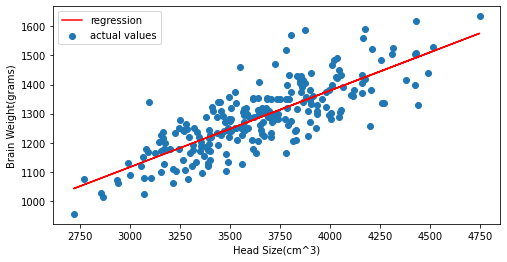

In [148]:
plt.figure(figsize=(8,4))
plt.scatter(df["Head Size(cm^3)"],df["Brain Weight(grams)"],label='actual values')
plt.plot(df['Head Size(cm^3)'],pred,label='regression',c='r')
plt.xlabel("Head Size(cm^3)")
plt.ylabel("Brain Weight(grams)")
plt.legend(loc="best")
